**Сердюк, 474б**

Объявление функций для отрисовки изображений

In [1]:
from PIL import Image, ImageDraw, ImageOps
import matplotlib.pyplot as plt
from matplotlib.pyplot import hist
import numpy as np
import math
%matplotlib inline

#функция вывода изображения
def draw_img(image):
  plt.figure(figsize=(8,8))
  plt.imshow(image)
  plt.show()

def draw_img2(image1,image2):
  plt.figure(figsize=(14,8),dpi=90)
  plt.subplot(1,2,1)
  plt.imshow(image1)
  plt.subplot(1,2,2)
  plt.imshow(image2)
  plt.show()

def draw_hist2(image1,image2):
  plt.figure(figsize=(14,4),dpi=90)
  plt.subplot(1,2,1)
  plt.hist(np.ravel(image1),bins=256)
  plt.subplot(1,2,2)
  plt.hist(np.ravel(image2),bins=256)
  plt.show()

Загрузка изображений и перевод их в grayscale-режим (Y = 0.2126R + 0.7152G + 0.0722B)

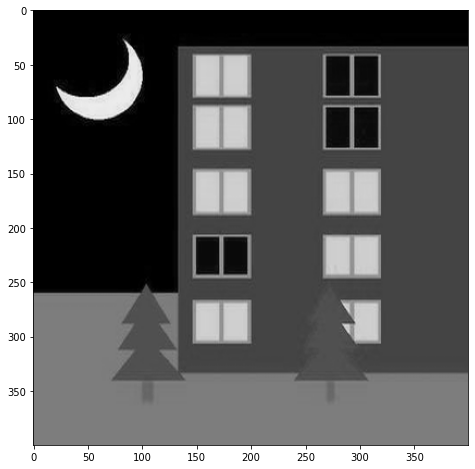

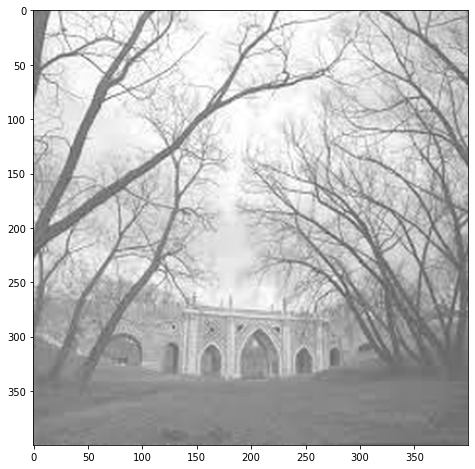

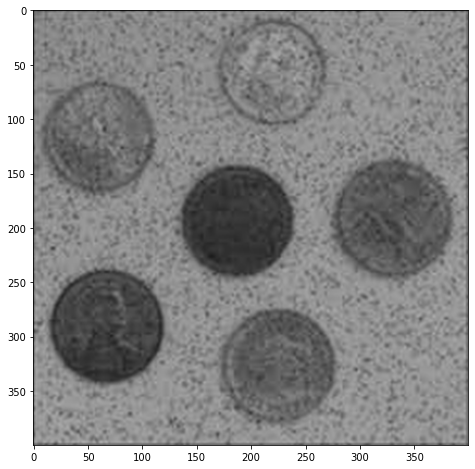

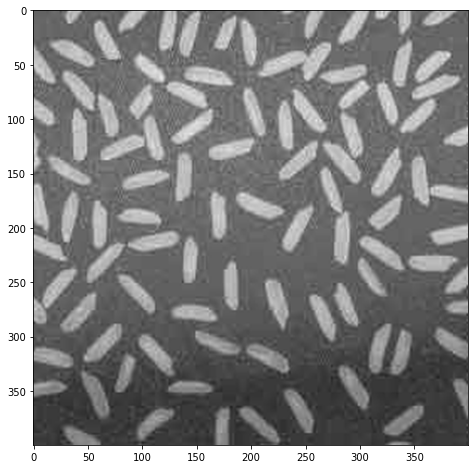

In [2]:
img_names = ['img1.jpg','img2.jpg','img3.jpg','img4.jpg']
new_img_names = []
for _data in img_names:
  image = Image.open(_data) #Открываем изображение
  image = image.resize((400,400), Image.ANTIALIAS)
  draw = ImageDraw.Draw(image) #Создаем инструмент для рисования
  if _data == 'img1.jpg':
    width = image.size[0]
    height = image.size[1] 
    pix = image.load()
    for i in range(width):
      for j in range(height):
        r, g, b = pix[i, j]
        Y = 0.2126*r+0.7152*g+0.0722*b
        draw.point((i, j), (int(Y), int(Y), int(Y)))
  image.save('grayscale_'+_data)
  new_img_names.append('grayscale_'+_data)
  draw_img(image)

Построение гистограмм. У изображения, полученное в первой лабораторной работе видно меньшее разнообразие пикселей по интенсивности, так как при его создании использовалась заливка сплошным цветом основных фигур. По остальным гистограммам можно сказать какой оттенок серого преобладает в данных изображениях

grayscale_img1.jpg


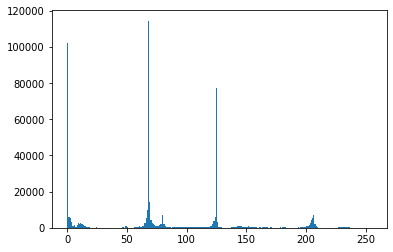

grayscale_img2.jpg


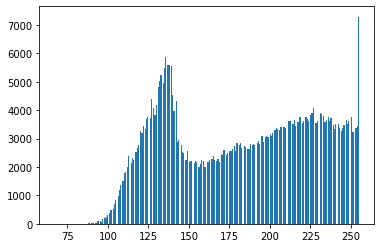

grayscale_img3.jpg


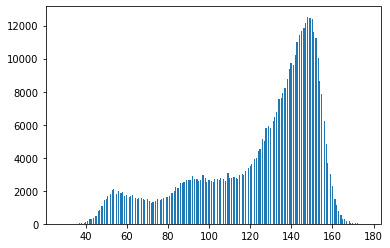

grayscale_img4.jpg


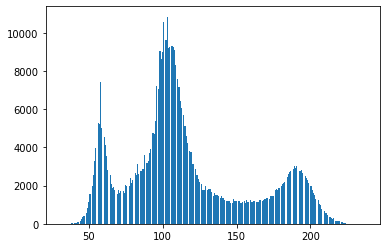

In [3]:
for _data in new_img_names:
  image = Image.open(_data) #Открываем изображение
  print(_data)
  plt.hist(np.ravel(image),bins=256)
  plt.show()

При выполнении логарифмческого преобразования изображения на некоторых изображениях получилось уменьшить шум (изображения с монетами и рисом). Анализ гистограмм показывает, что данная операция делает реже значения оттенка цвета, при этом увеличивая интенсивность других.

grayscale_img1.jpg


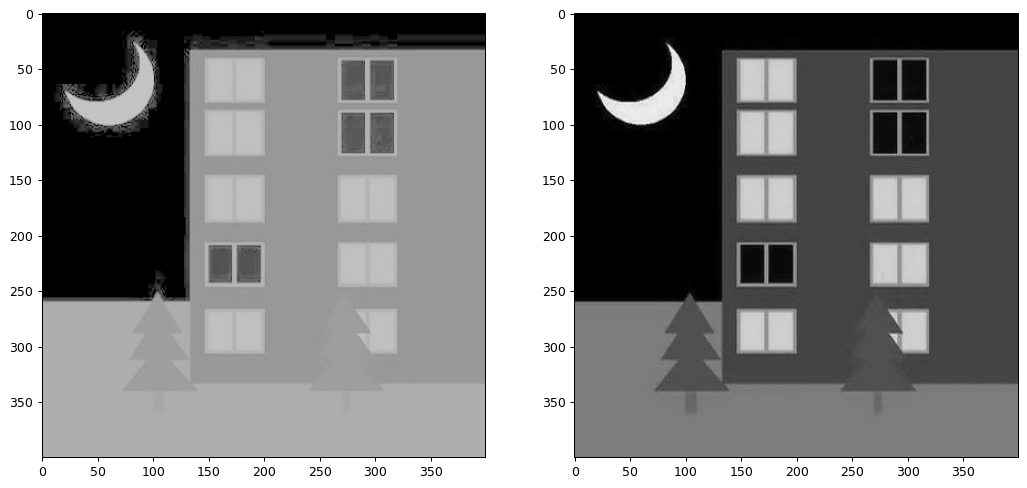

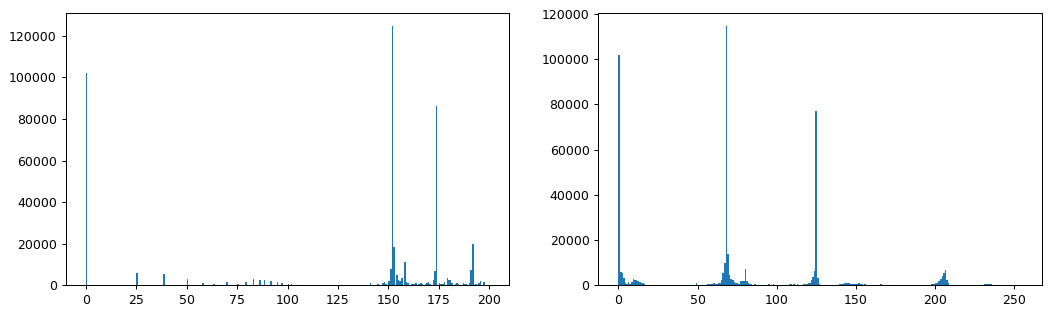

grayscale_img2.jpg


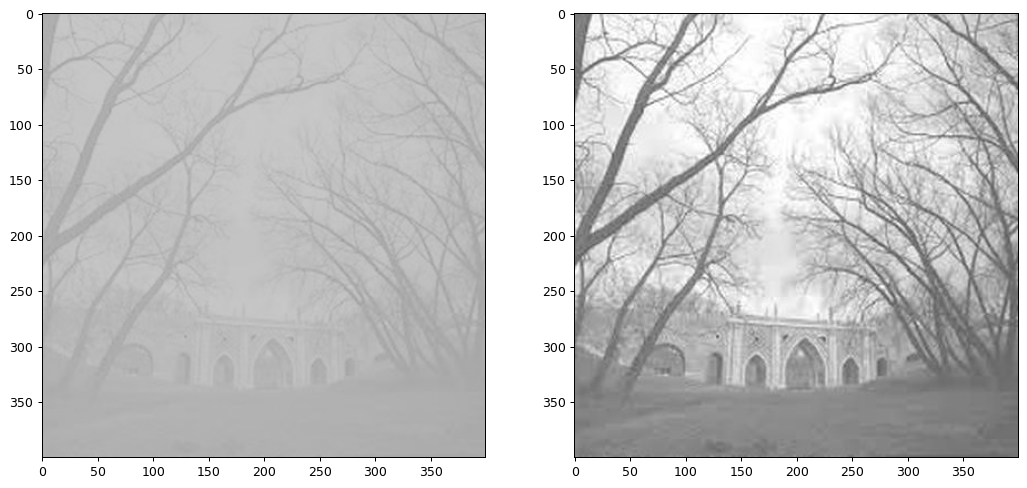

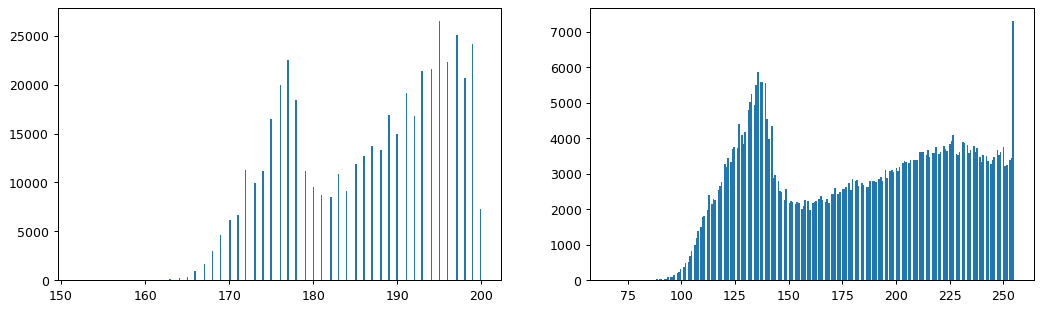

grayscale_img3.jpg


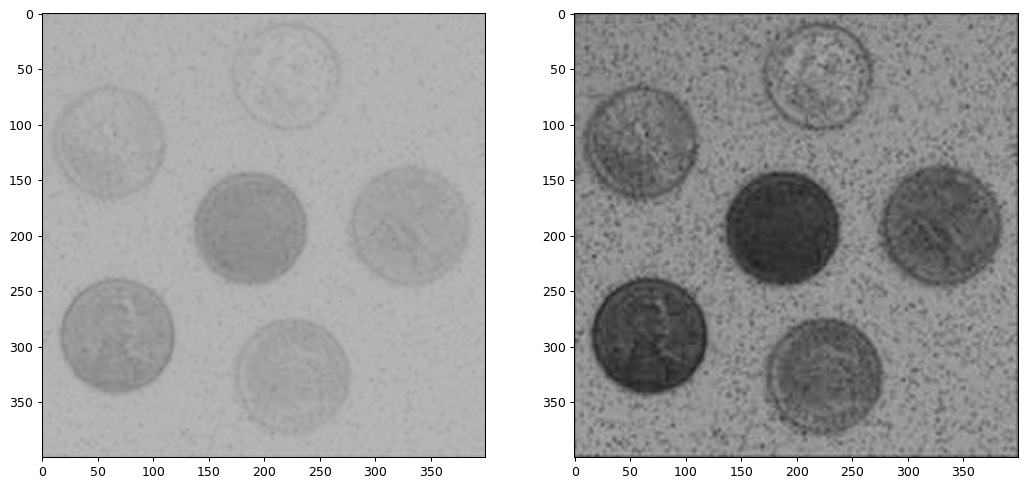

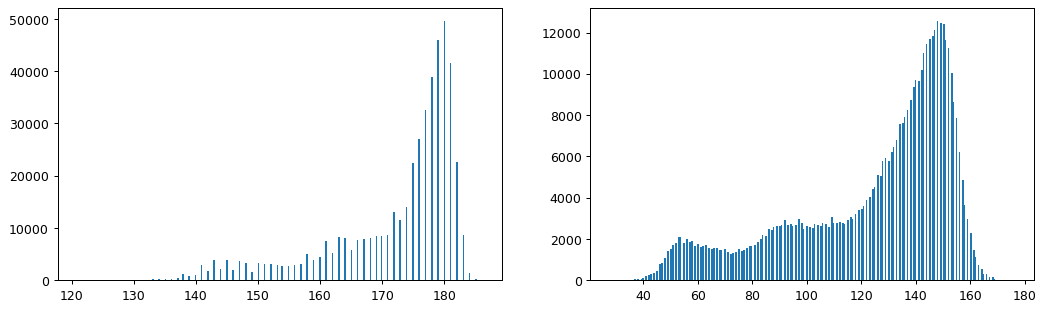

grayscale_img4.jpg


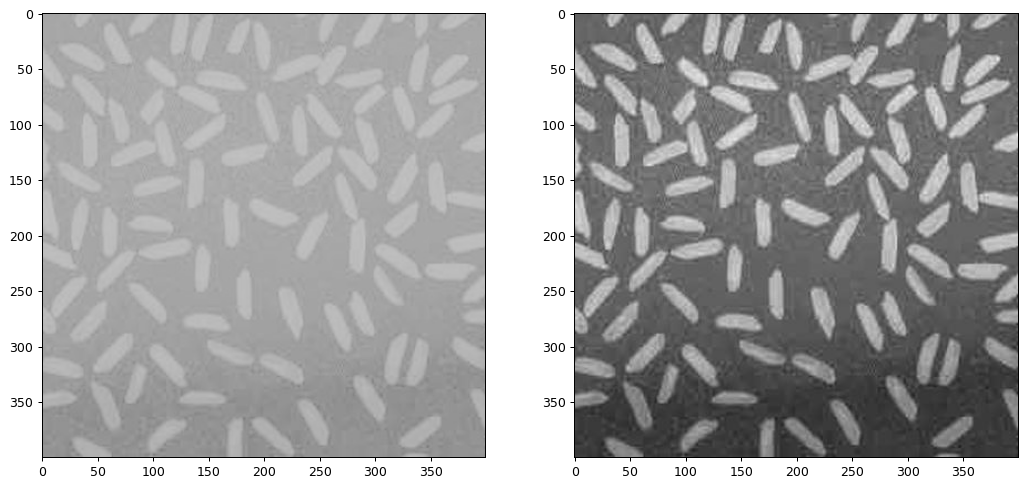

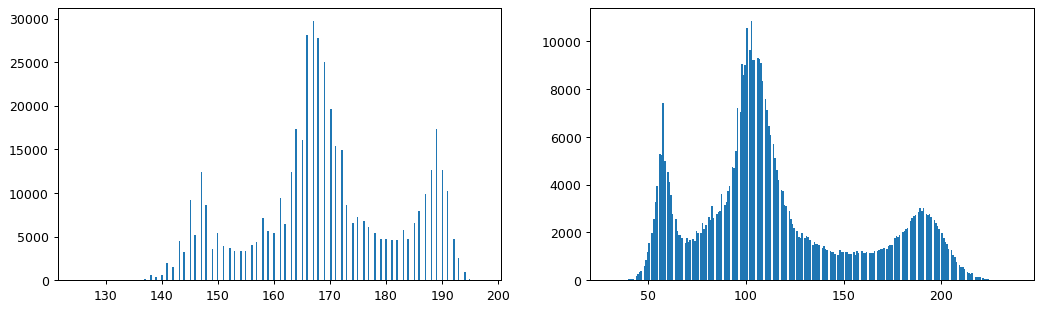

In [4]:
def log_rgb(a):
  c = 25
  return int(c*math.log2(1+a))

for _data in new_img_names:
  image = Image.open(_data) #Открываем изображение
  image_source = Image.open(_data)
  draw = ImageDraw.Draw(image) #Создаем инструмент для рисования
  width = image.size[0]
  height = image.size[1] 
  pix = image.load()
  for i in range(width):
    for j in range(height):
      r, g, b = pix[i, j]
      draw.point((i, j), (log_rgb(r),log_rgb(g),log_rgb(b)))
  #image.save(_data)
  print(_data)
  draw_img2(image,image_source)
  draw_hist2(image,image_source)

При степенном преобразовании наблюдается переход от одних оттенков к дургим (например, от светлых к тёмным). Гистограммы показывают, что изменяются границы значений пикселей, а также их интенсивность. При этом на изображениях уменьшается детализация мелких частей и выделяются более крупные

grayscale_img1.jpg


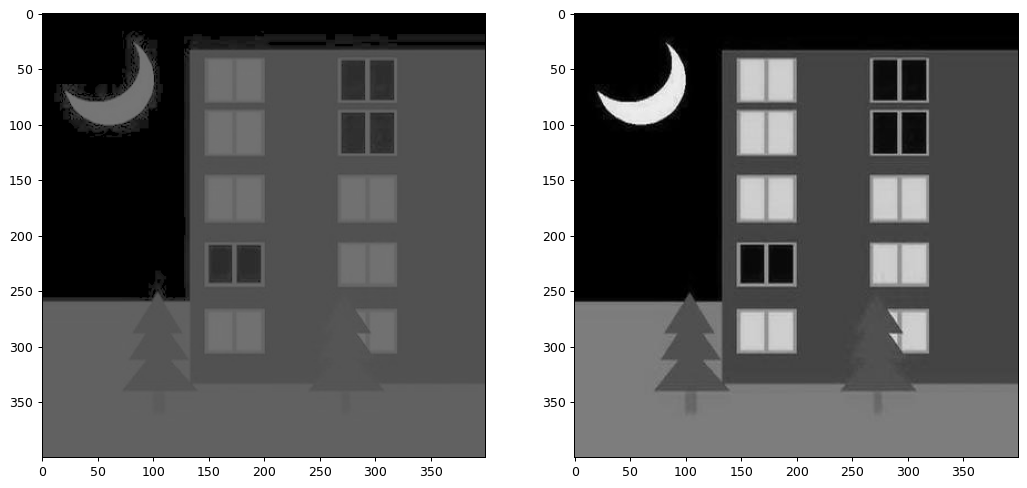

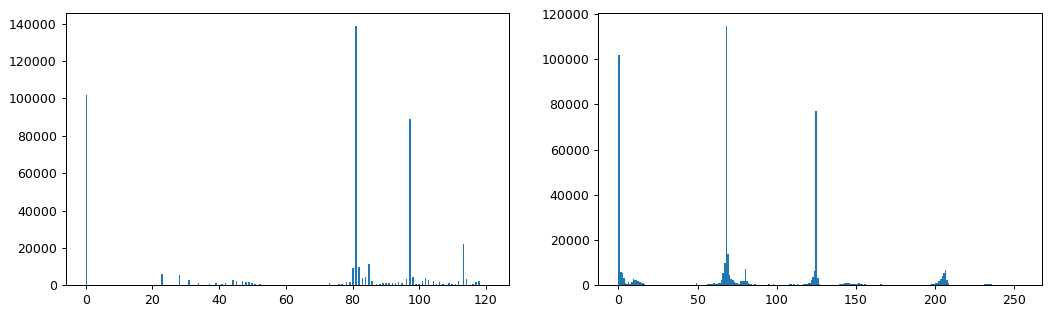

grayscale_img2.jpg


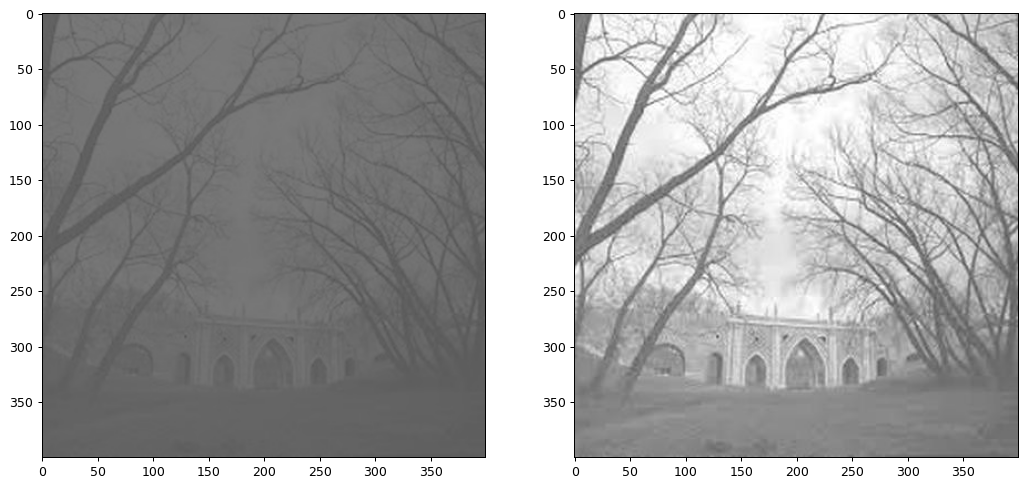

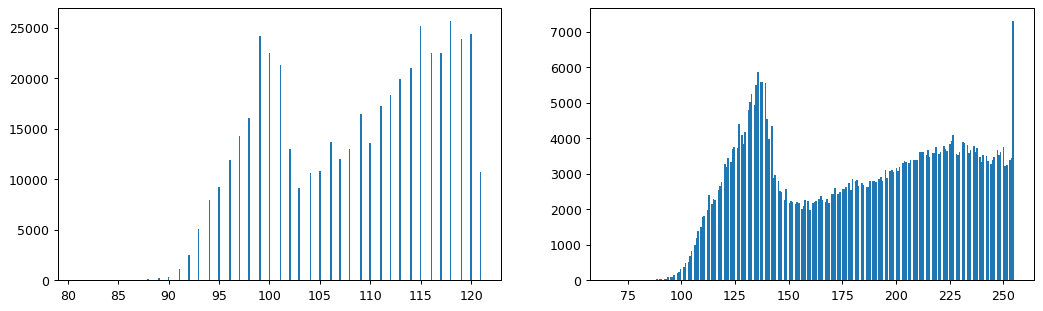

grayscale_img3.jpg


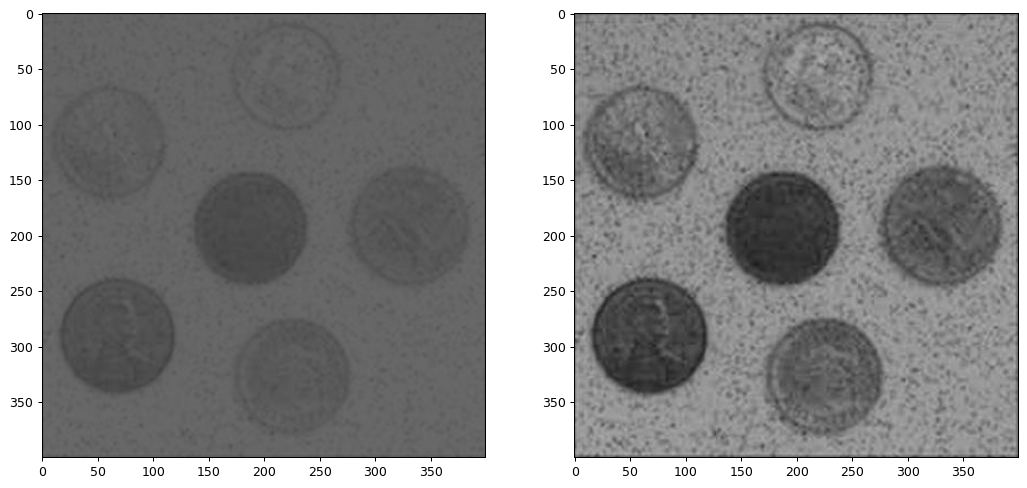

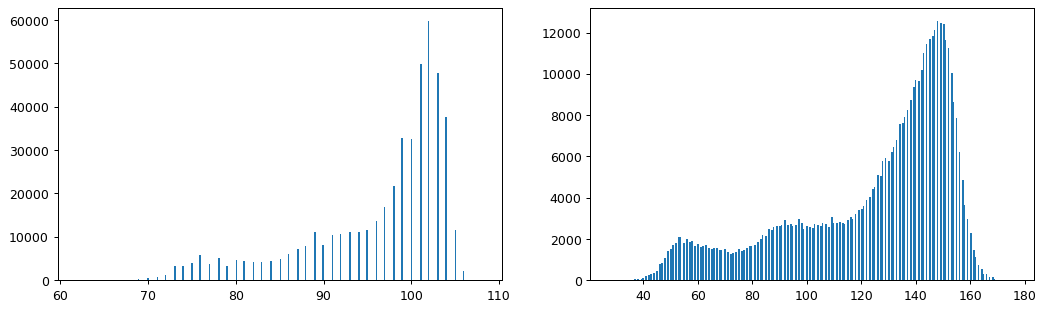

grayscale_img4.jpg


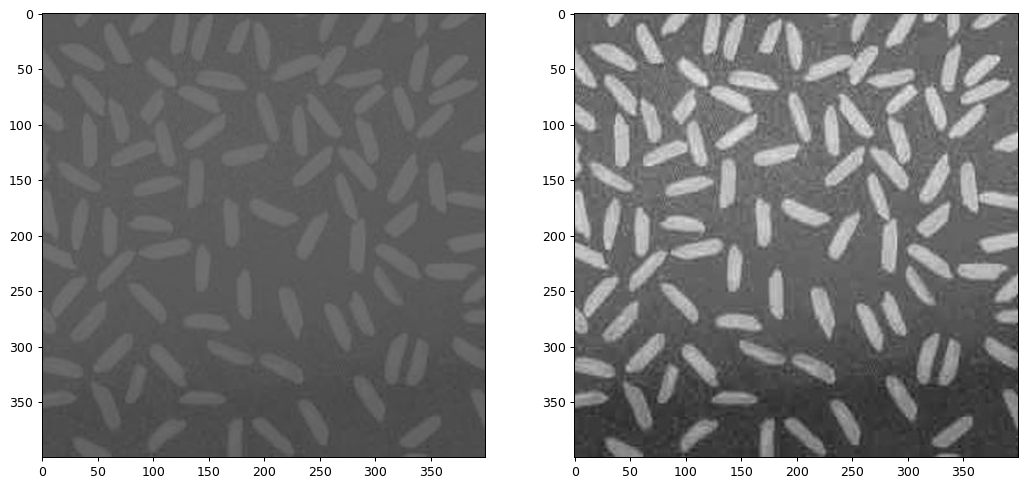

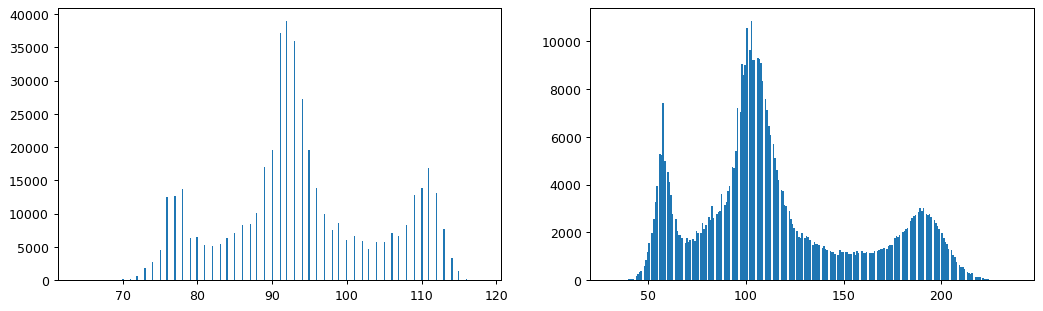

In [5]:
def deg_rgb(a):
  g = 0.3
  c = 23
  res = int(c*a**g)
  if res > 255:
    return 255
  else:
    return res

for _data in new_img_names:
  image = Image.open(_data) #Открываем изображение
  image_source = Image.open(_data)
  draw = ImageDraw.Draw(image) #Создаем инструмент для рисования
  width = image.size[0]
  height = image.size[1] 
  pix = image.load()
  for i in range(width):
    for j in range(height):
      r, g, b = pix[i, j]
      draw.point((i, j), (deg_rgb(r),deg_rgb(g),deg_rgb(b)))
  #image.save(_data)
  print(_data)
  draw_img2(image,image_source)
  draw_hist2(image,image_source)

При кусочно-линейном преобразовании происходит замещение серых оттенков пикселей на более тёмные или светлые. Анализ гистограмм показывает, что уменьшается интенсивность и плотность средних значений и увеличиваются крайние значения

grayscale_img1.jpg


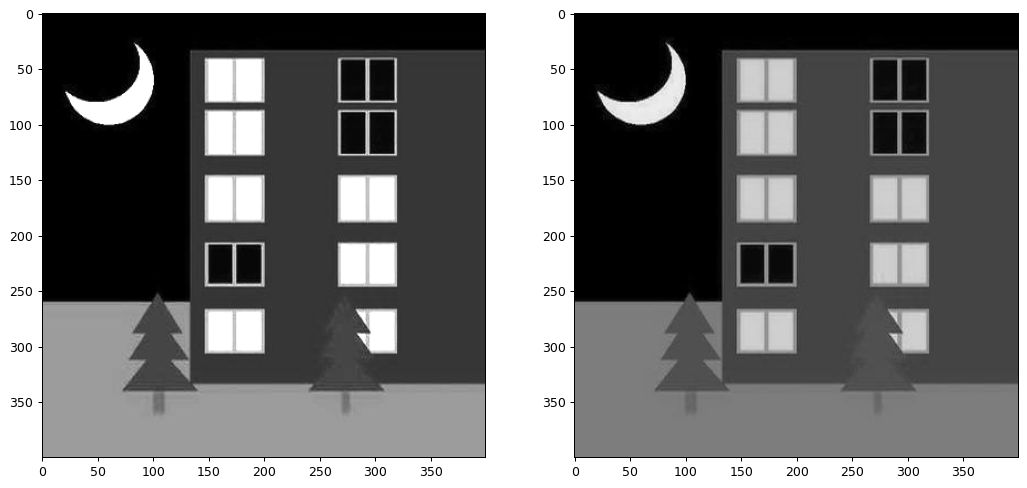

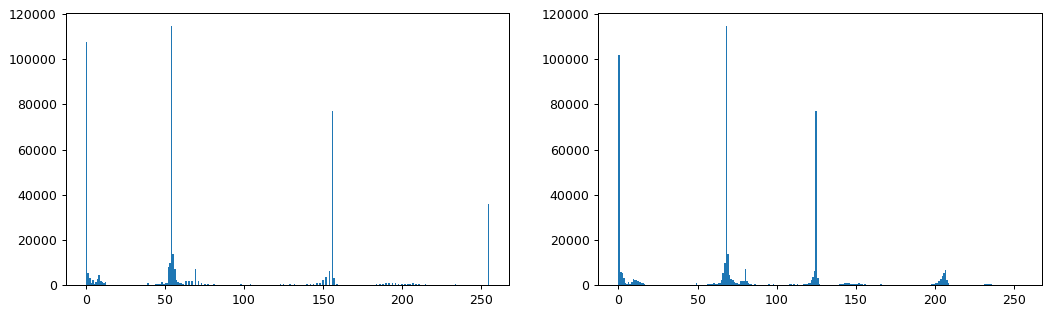

grayscale_img2.jpg


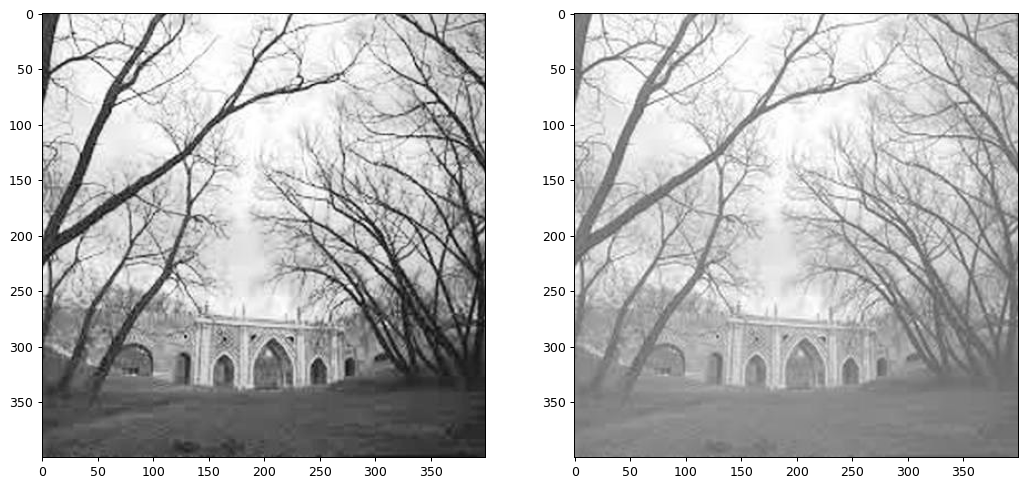

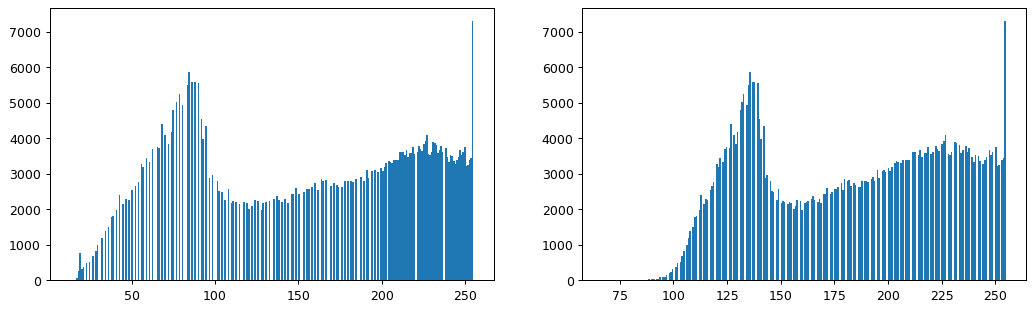

grayscale_img3.jpg


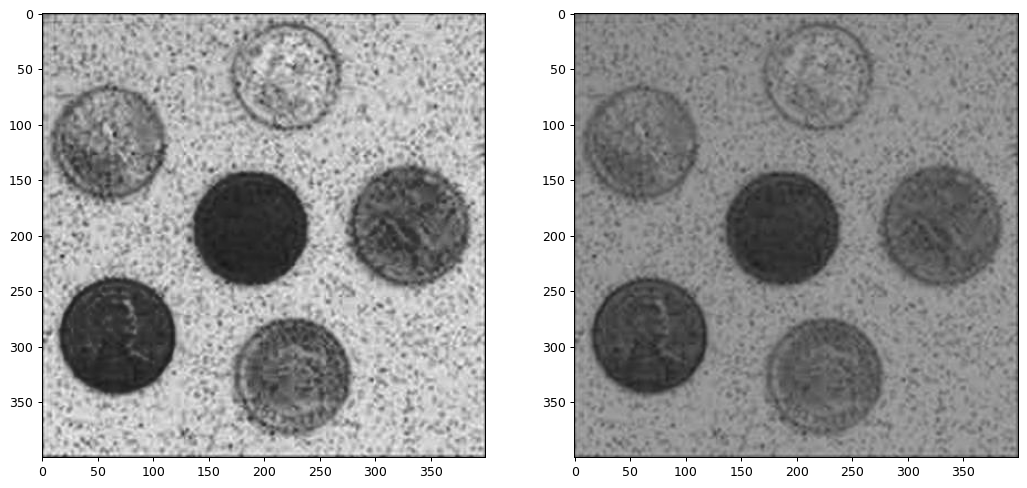

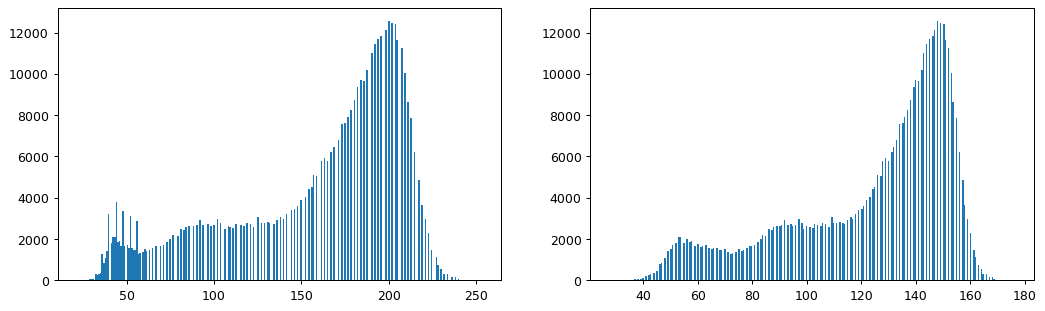

grayscale_img4.jpg


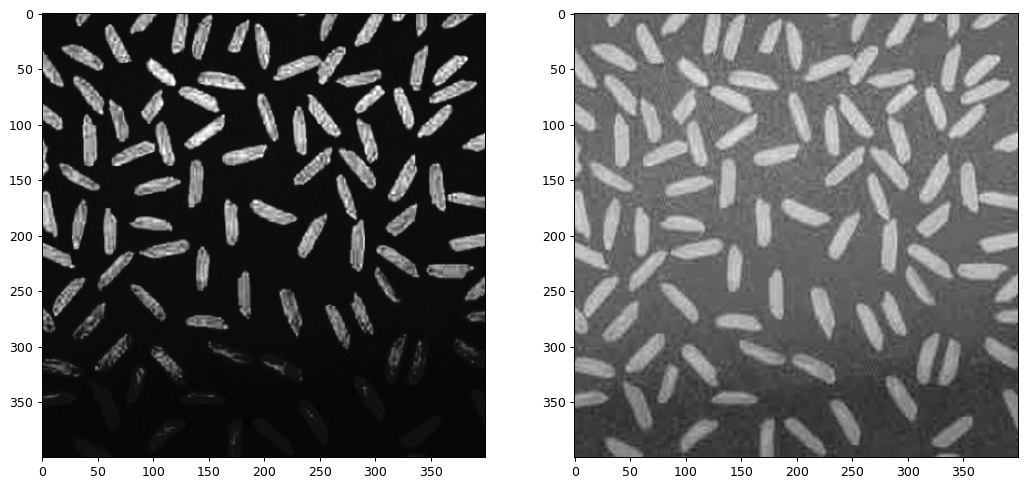

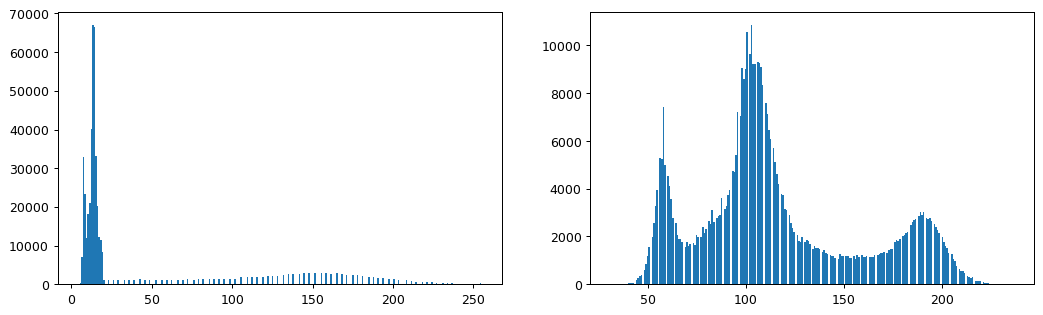

In [6]:
def pix_Cont(pix,arr):
  r1 = arr[0]
  s1 = arr[1]
  r2 = arr[2]
  s2 = arr[3]
  if (0 <= pix and pix <= r1):
    return int((s1 / r1)*pix)
  elif (r1 < pix and pix <= r2):
    return int(((s2 - s1)/(r2 - r1)) * (pix - r1) + s1)
  else:
    return int(((255 - s2)/(255 - r2)) * (pix - r2) + s2)

arr_par = [[75,60,200,300],[100,20,200,200],[75,60,200,300],[150,20,250,350]]

for _data in range(len(new_img_names)):
  image = Image.open(new_img_names[_data]) #Открываем изображение
  image_source = Image.open(new_img_names[_data])
  draw = ImageDraw.Draw(image) #Создаем инструмент для рисования
  width = image.size[0]
  height = image.size[1] 
  pix = image.load()
  for i in range(width):
    for j in range(height):
      r, g, b = pix[i, j]
      draw.point((i, j), (pix_Cont(r,arr_par[_data]),pix_Cont(g,arr_par[_data]),pix_Cont(b,arr_par[_data])))
  #image.save(n)
  print(new_img_names[_data])
  draw_img2(image,image_source)
  draw_hist2(image,image_source)

При данном преобразовании происходит выделение диапазона значений одним цветом и замещением противоположным цветом значений вне диапазона. На гистограммах видно данное преобразование

grayscale_img1.jpg


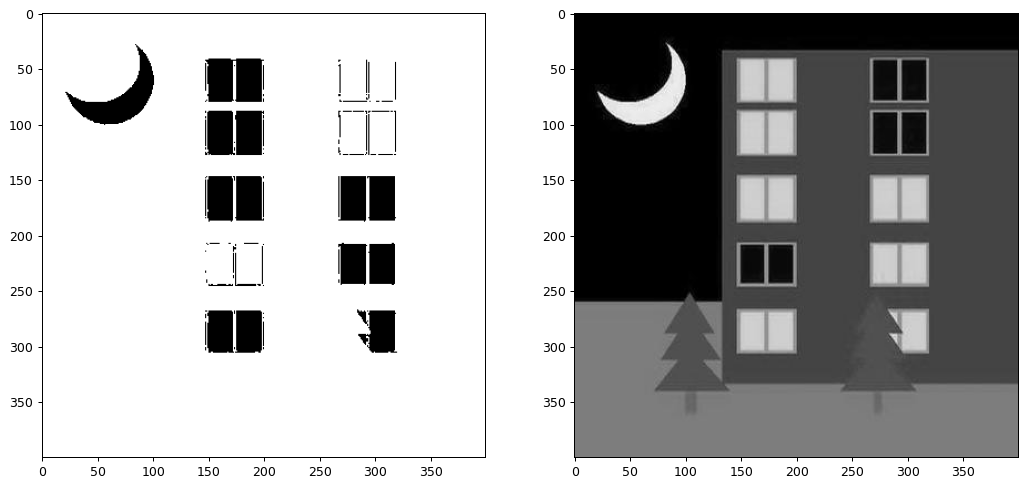

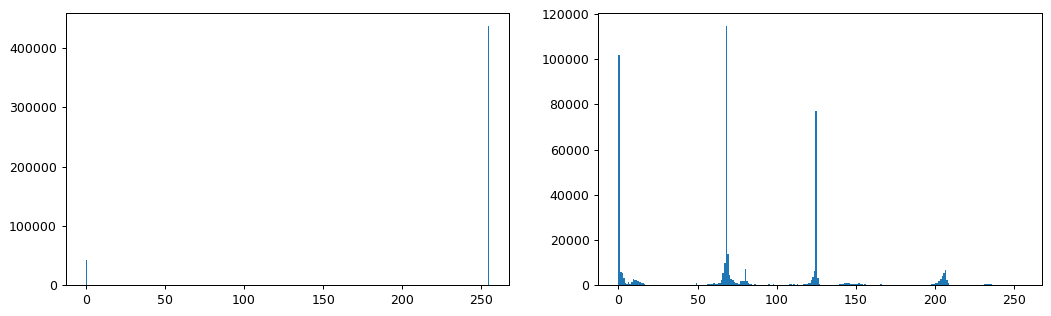

grayscale_img2.jpg


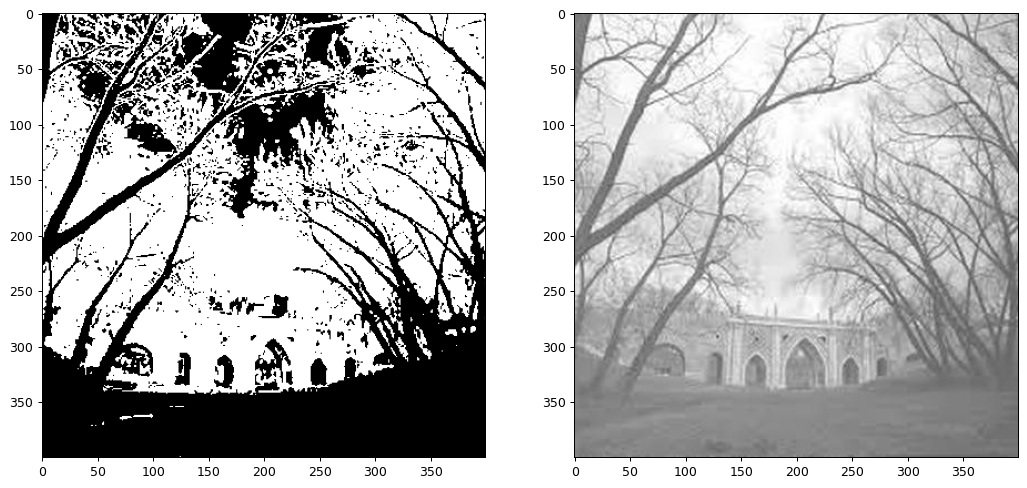

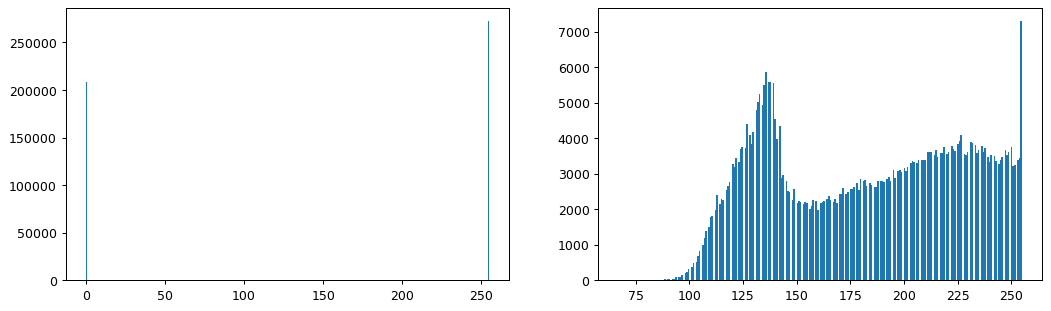

grayscale_img3.jpg


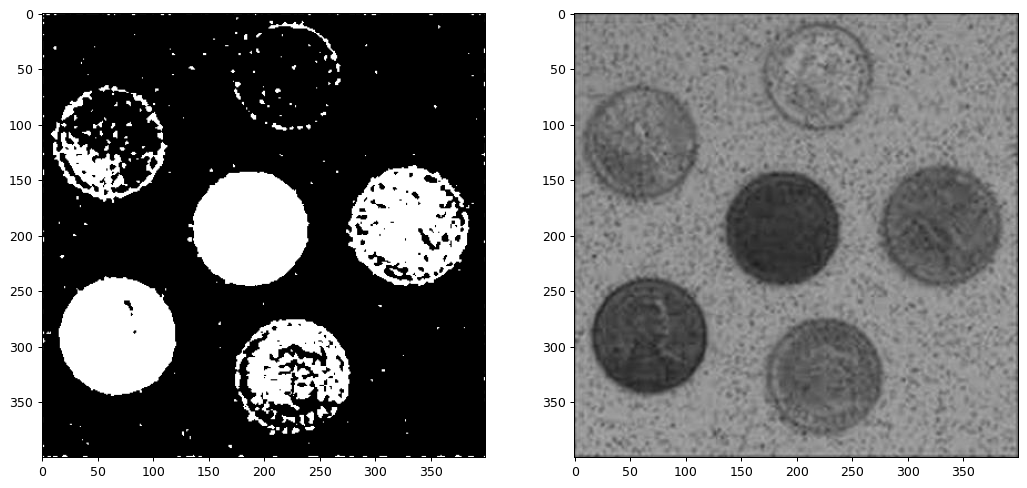

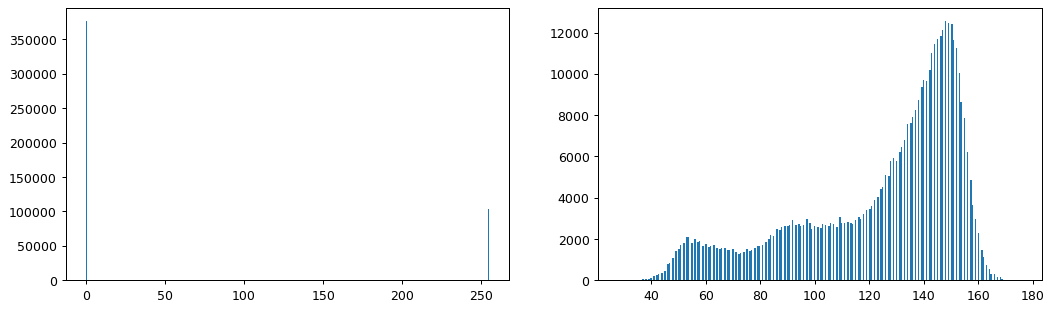

grayscale_img4.jpg


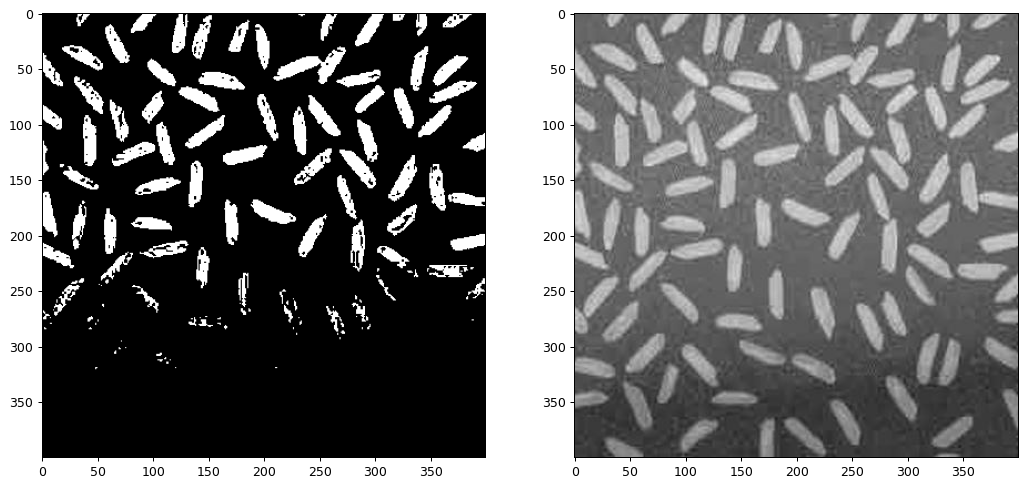

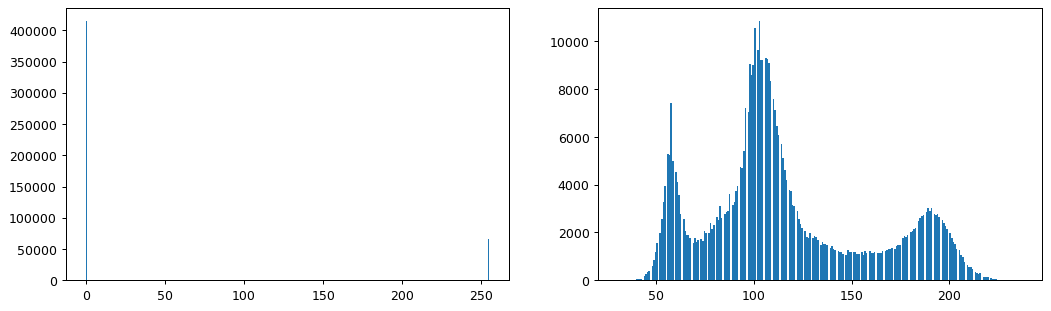

In [7]:
def pix_Cont2(pix,arr):
  r1 = arr[0]
  r2 = arr[1]
  lvl = arr[2]
  if (r1 <= pix and pix <= r2):
    return lvl
  else:
    return 255-lvl

arr_par = [[150,255,0],[150,240,255],[100,180,0],[0,180,0]]

for _data in range(len(new_img_names)):
  image = Image.open(new_img_names[_data]) #Открываем изображение
  image_source = Image.open(new_img_names[_data])
  draw = ImageDraw.Draw(image) #Создаем инструмент для рисования
  width = image.size[0]
  height = image.size[1] 
  pix = image.load()
  for i in range(width):
    for j in range(height):
      r, g, b = pix[i, j]
      draw.point((i, j), (pix_Cont2(r,arr_par[_data]),pix_Cont2(g,arr_par[_data]),pix_Cont2(b,arr_par[_data])))
  #image.save(n)
  print(new_img_names[_data])
  draw_img2(image,image_source)
  draw_hist2(image,image_source)

При данном преобразовании происходит замещение диапазона значений одним цветом и сохранение исходных значений для остальных.

grayscale_img1.jpg


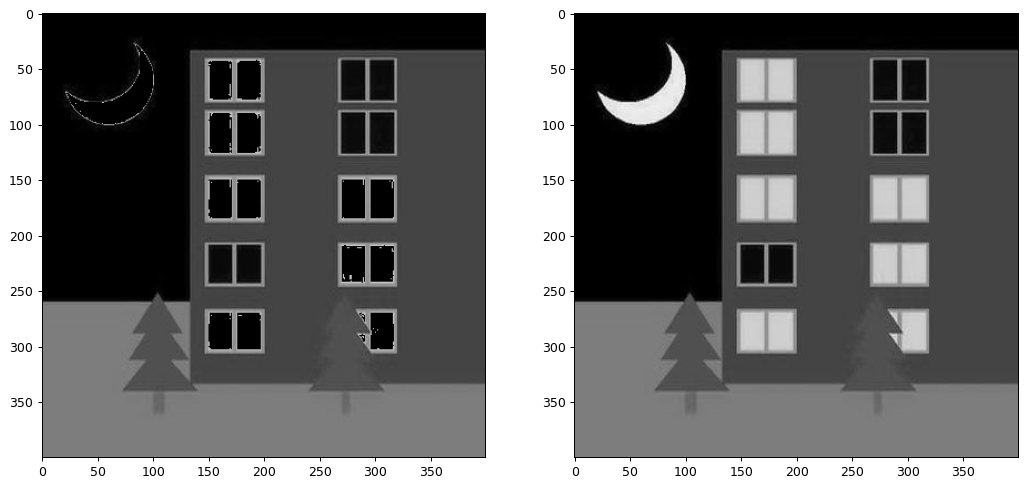

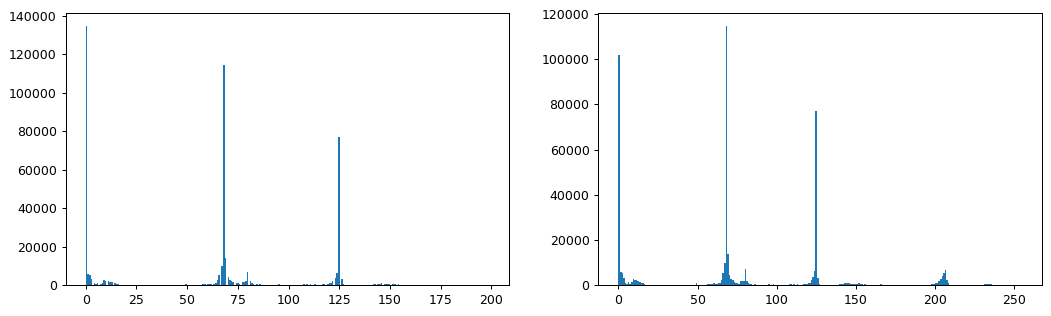

grayscale_img2.jpg


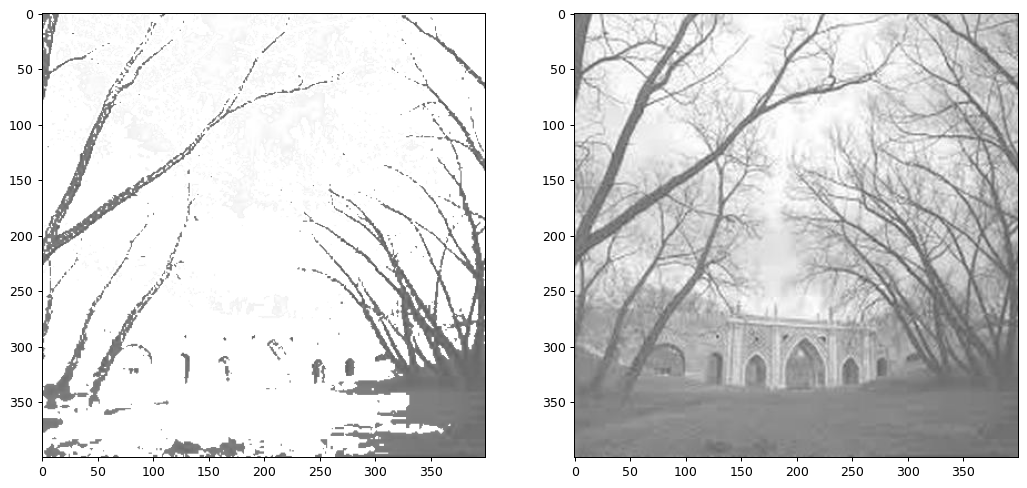

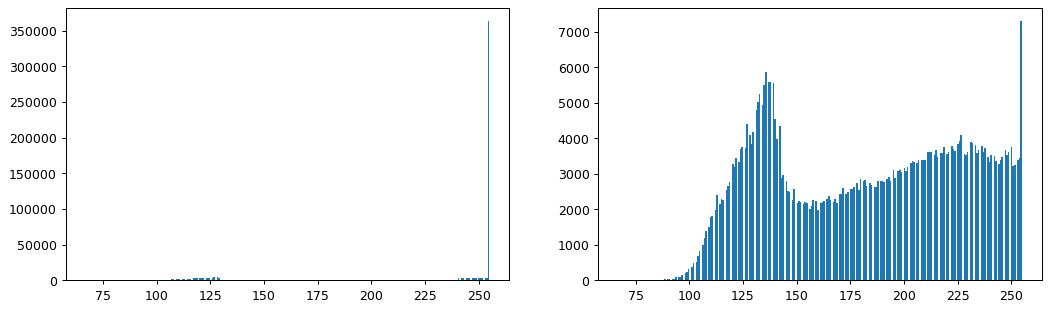

grayscale_img3.jpg


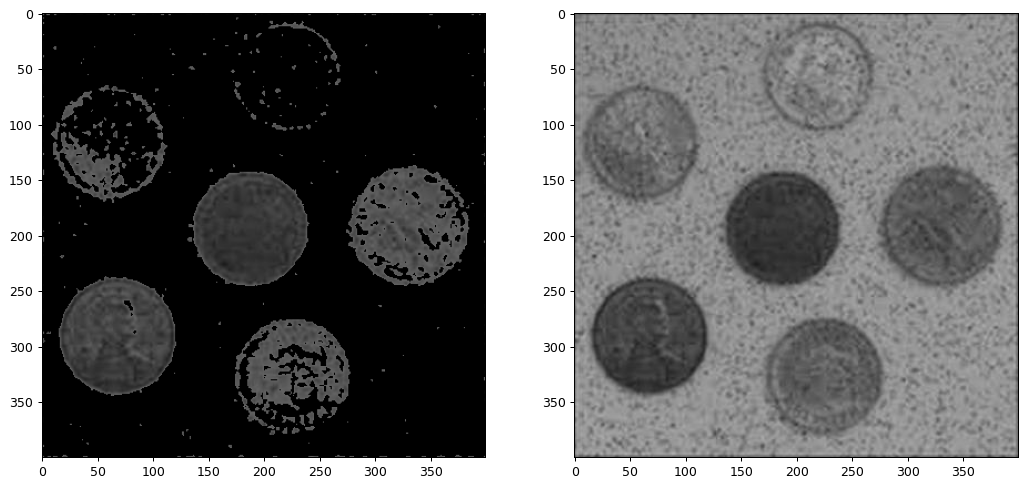

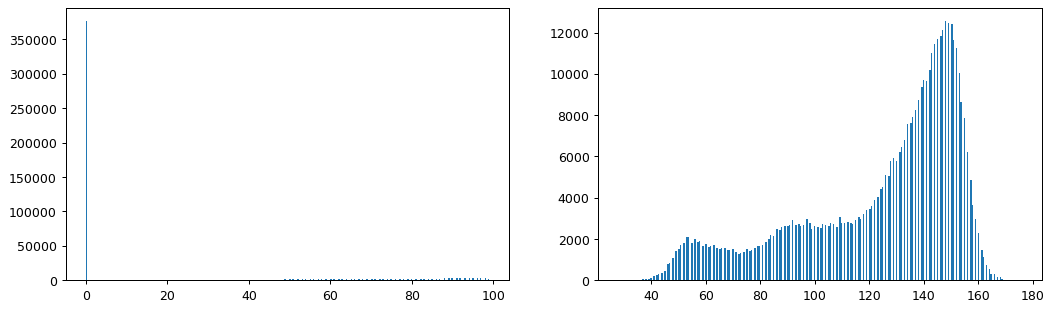

grayscale_img4.jpg


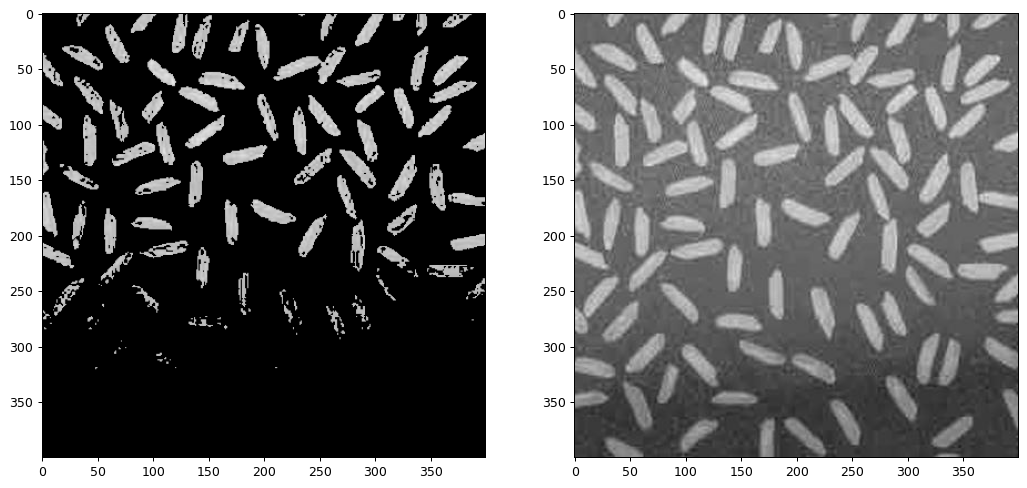

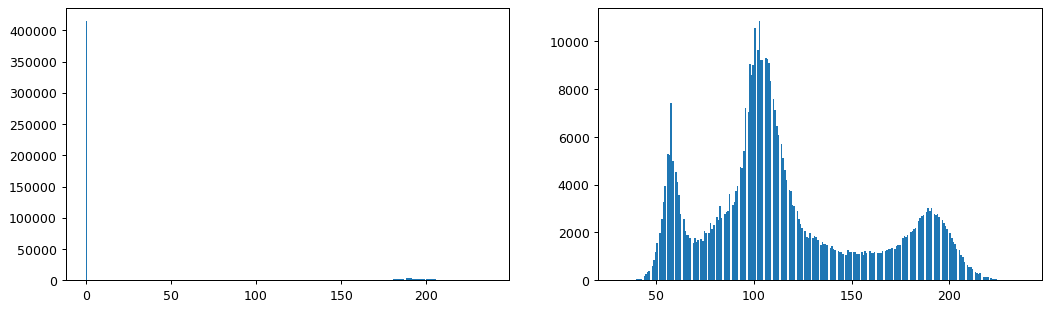

In [8]:
def pix_Cont3(pix,arr):
  r1 = arr[0]
  r2 = arr[1]
  lvl = arr[2]
  if (r1 <= pix and pix <= r2):
    return lvl
  else:
    return pix

arr_par = [[200,255,0],[130,240,255],[100,180,0],[0,180,0]]

for _data in range(len(new_img_names)):
  image = Image.open(new_img_names[_data]) #Открываем изображение
  image_source = Image.open(new_img_names[_data])
  draw = ImageDraw.Draw(image) #Создаем инструмент для рисования
  width = image.size[0]
  height = image.size[1] 
  pix = image.load()
  for i in range(width):
    for j in range(height):
      r, g, b = pix[i, j]
      draw.point((i, j), (pix_Cont3(r,arr_par[_data]),pix_Cont3(g,arr_par[_data]),pix_Cont3(b,arr_par[_data])))
  #image.save(n)
  print(new_img_names[_data])
  draw_img2(image,image_source)
  draw_hist2(image,image_source)

Локализуем отдельные элементы на изображениях: дом на 1м, рис на 2м, монетки на 3м, деревья на 4м.

grayscale_img1.jpg


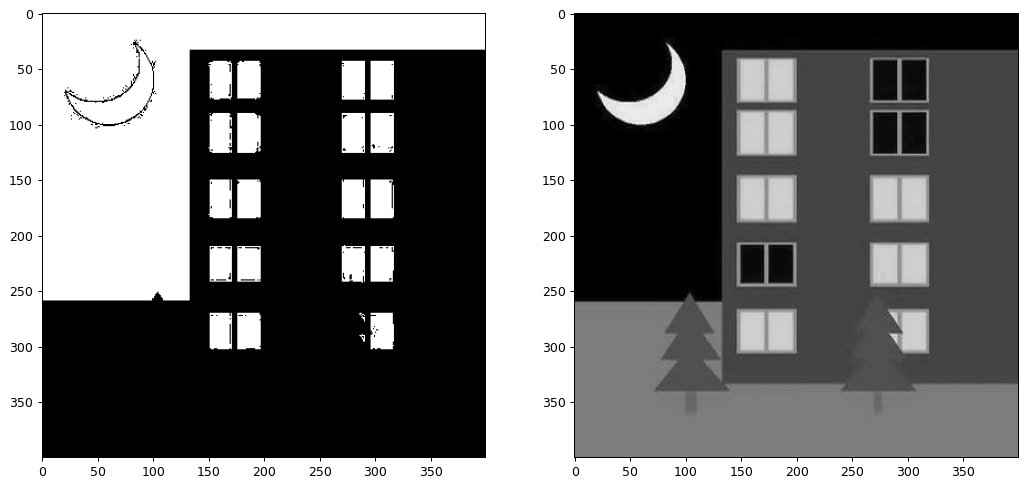

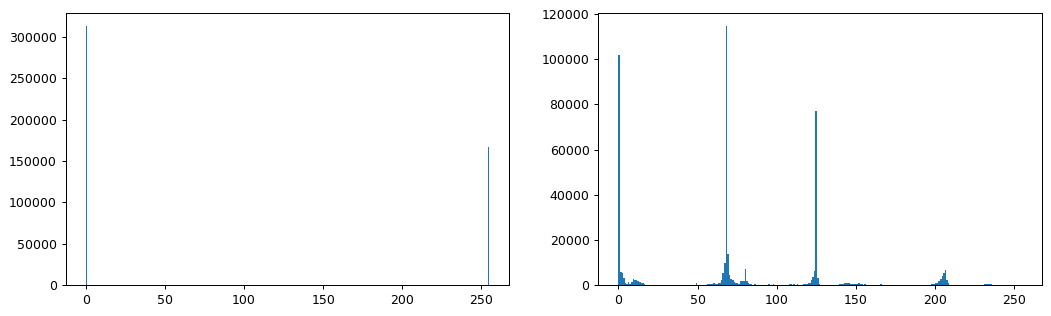

grayscale_img2.jpg


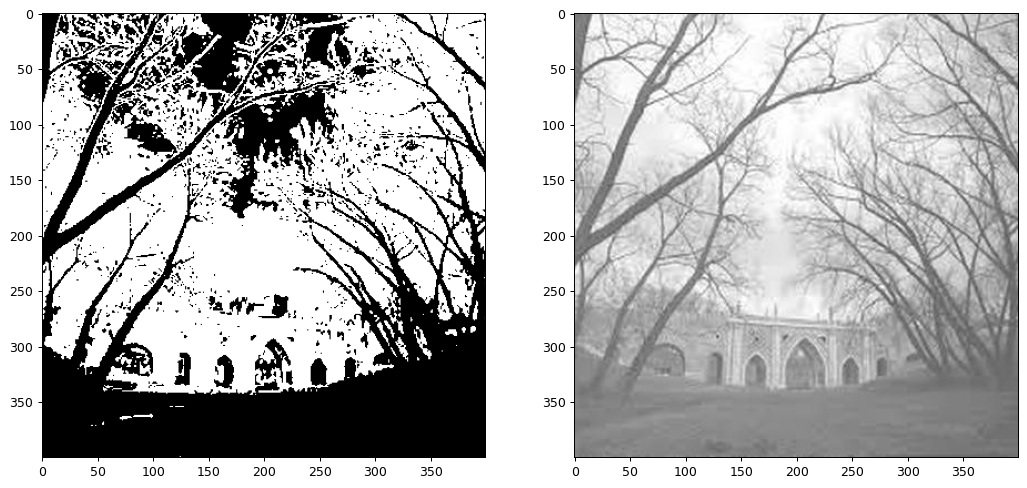

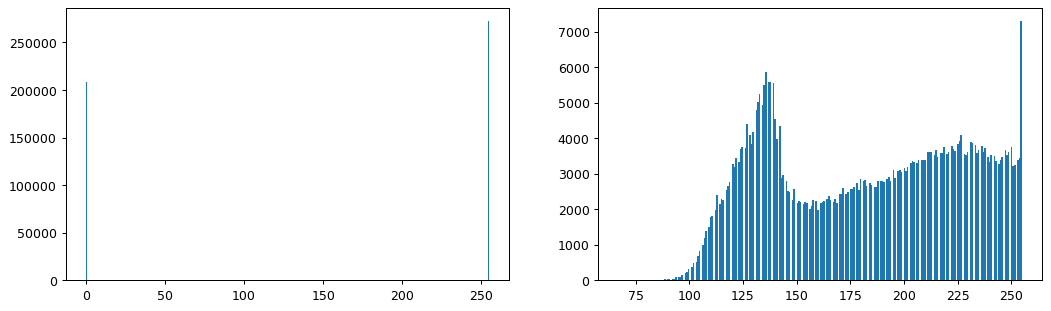

grayscale_img3.jpg


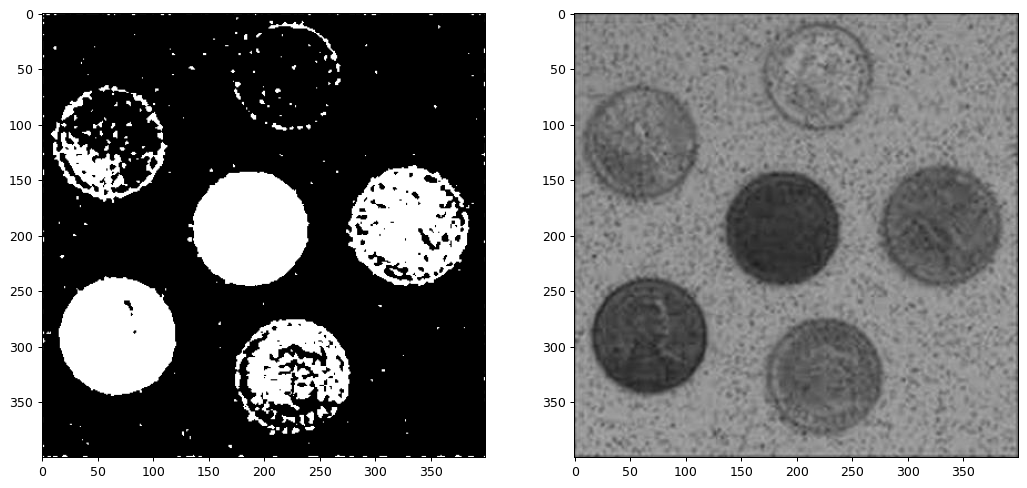

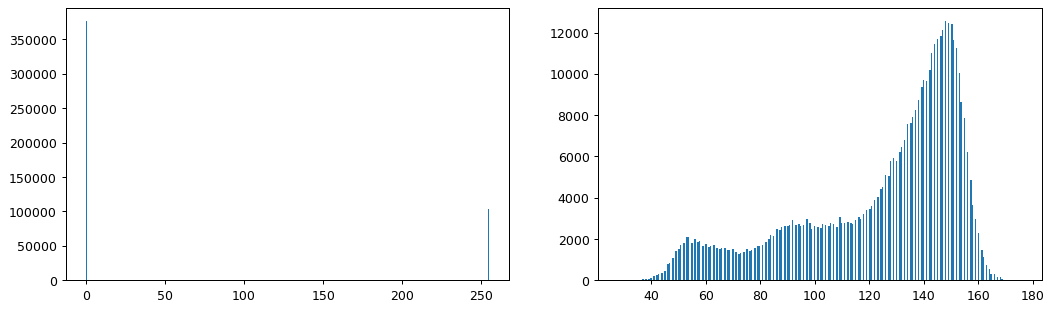

grayscale_img4.jpg


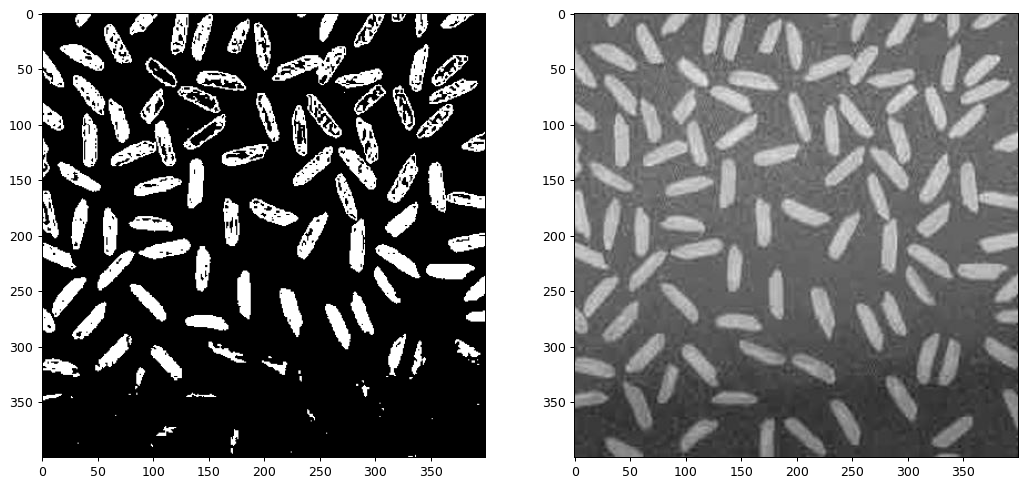

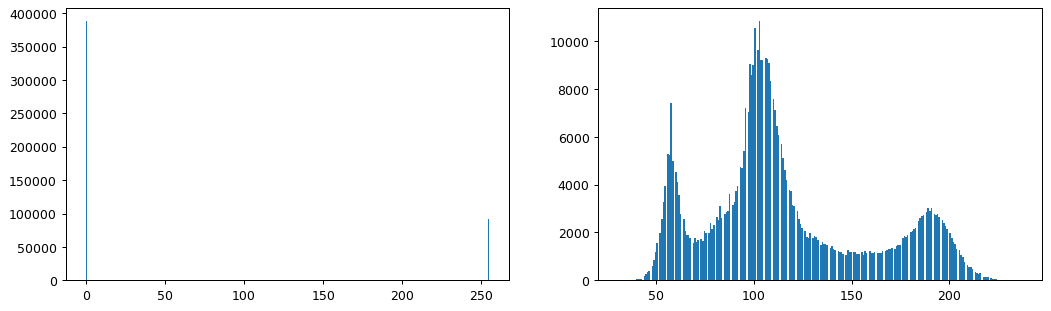

In [9]:
def pix_Cont2(pix,arr):
  r1 = arr[0]
  r2 = arr[1]
  lvl = arr[2]
  if (r1 <= pix and pix <= r2):
    return lvl
  else:
    return 255-lvl

arr_par = [[20,200,0],[150,240,255],[100,180,0],[150,200,255]]

for _data in range(len(new_img_names)):
  image = Image.open(new_img_names[_data]) #Открываем изображение
  image_source = Image.open(new_img_names[_data])
  draw = ImageDraw.Draw(image) #Создаем инструмент для рисования
  width = image.size[0]
  height = image.size[1] 
  pix = image.load()
  for i in range(width):
    for j in range(height):
      r, g, b = pix[i, j]
      draw.point((i, j), (pix_Cont2(r,arr_par[_data]),pix_Cont2(g,arr_par[_data]),pix_Cont2(b,arr_par[_data])))
  #image.save(n)
  print(new_img_names[_data])
  draw_img2(image,image_source)
  draw_hist2(image,image_source)